In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.ion()  # interactive mode

# Fix seed
np.random.seed(150)

# rotation and scaling matrix definition
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])
# class 1 points
c1d = (np.random.randn(100,2)).dot(sca).dot(rot)

# class 2 points
c2d1 = np.random.randn(25,2)+[-10, 2]
c2d2 = np.random.randn(25,2)+[-7, -2]
c2d3 = np.random.randn(25,2)+[-2, -6]
c2d4 = np.random.randn(25,2)+[5, -7]

data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

# generate labels
l1c = np.ones(100, dtype=int)
l2c = np.zeros(100, dtype=int)
labels = np.concatenate((l1c, l2c))

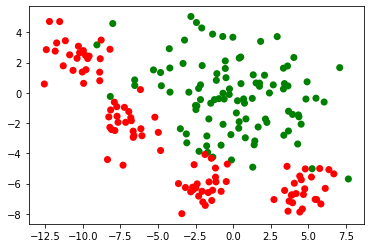

In [3]:
# Plot the generated data
cmp = np.array(['r','g'])
plt.figure()
plt.scatter(data[:,0],data[:,1], c=cmp[labels], s=50, edgecolors='none')

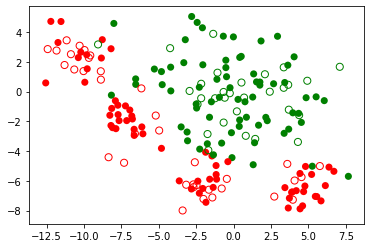

In [4]:
# splitting in training and test set
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.33)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

In [11]:
X_train1.shape

(134, 2)

In [13]:
X_test1.shape

(66, 2)

In [15]:
# Using FDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Evaluation and display for split1
lda.fit(X_train1, y_train1)
print("Training set error : {}".format(lda.score(X_train1, y_train1)))

print("Test set error : {}".format(lda.score(X_test1, y_test1)))

Training set error : 0.835820895522388
Test set error : 0.9393939393939394


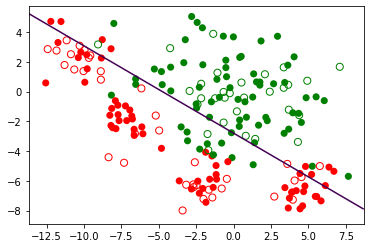

In [16]:
# Display results
plt.figure()
plt.scatter(X_train1[:,0], X_train1[:,1], c=cmp[y_train1], s=50, edgecolors='none')
plt.scatter(X_test1[:,0], X_test1[:,1], c='none', s=50, edgecolors=cmp[y_test1])

# Calculate the probability of each point of belonginng to each class
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# Drawing the frontiere of probability = 0.5
plt.contour(xx, yy, Z, [0.5])

In [17]:
# Trying with a new split:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, labels, test_size=0.33)
lda2 = LinearDiscriminantAnalysis()

# Evaluation and display for split1
lda2.fit(X_train2, y_train2)
print("Training set error : {}".format(lda2.score(X_train2, y_train2)))
print("Test set error : {}".format(lda2.score(X_test2, y_test2)))

Training set error : 0.8507462686567164
Test set error : 0.9090909090909091


In [21]:
# Over Again
# Trying with a new split:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data, labels, test_size=0.33)
lda3 = LinearDiscriminantAnalysis()

# Evaluation and display for split1
lda3.fit(X_train3, y_train3)
print("Training set error : {}".format(lda3.score(X_train3, y_train3)))
print("Test set error : {}".format(lda3.score(X_test3, y_test3)))

Training set error : 0.8880597014925373
Test set error : 0.8333333333333334


In [22]:
########################################################
### Now we are going to use a Multi - layer perceptron with alpha = 1e-5
########################################################

In [25]:
from sklearn.neural_network import MLPClassifier
# Using L-BFGS to optimize the perceptron
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)

# evaluation and diplay for split 1
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1)
print("The training score {}".format(train_score))

test_score = clf.score(X_test1, y_test1)
print("The test score {}".format(test_score))

The training score 1.0
The test score 0.9090909090909091


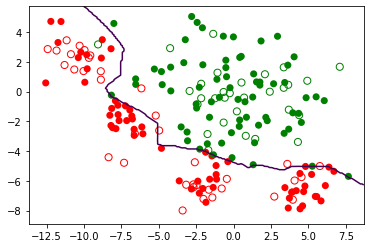

In [26]:
# Displaying the decision threshold

plt.figure()
# Display the point cloud training (filled points) and test (void points)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

# calculate the probability for all the points of plane
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# draw threshold with probability = 0.5
plt.contour(xx, yy, Z, [0.5])

In [27]:
########################################################
### Now we are going to use a Multi - layer perceptron with alpha = 1
########################################################

In [28]:
from sklearn.neural_network import MLPClassifier
# Using L-BFGS to optimize the perceptron
clf = MLPClassifier(solver='lbfgs', alpha=1)

# evaluation and diplay for split 1
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1)
print("The training score {}".format(train_score))

test_score = clf.score(X_test1, y_test1)
print("The test score {}".format(test_score))

The training score 0.9626865671641791
The test score 0.9393939393939394


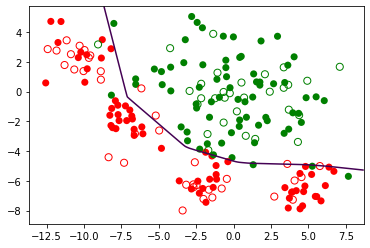

In [30]:
# Displaying the decision threshold

plt.figure()
# Display the point cloud training (filled points) and test (void points)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

# calculate the probability for all the points of plane
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# draw threshold with probability = 0.5
plt.contour(xx, yy, Z, [0.5])

In [31]:
###########################################
# Regression with linear models and MLP
###########################################

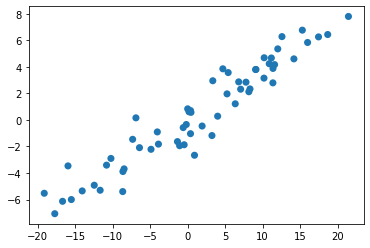

In [32]:
# Define rotation and scaling matrices
rot = np.array([[0.94, 0.34], [-0.34, 0.94]])
sca = np.array([[10, 0], [0, 1]])
# Generate bi-dimensional data
np.random.seed(60)
rd = np.random.randn(60,2)
datar = rd.dot(sca).dot(rot)
# Display points:
plt.figure()
plt.scatter(datar[:,0],datar[:,1],s=50,edgecolors='none')

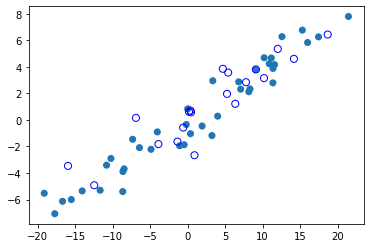

In [33]:
# Splitting points:
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')

In [37]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# evaluation and fit
reg.fit(X_train1.reshape(-1,1), y_train1)
# score returns determination coefficient
coeff_train = reg.score(X_train1.reshape(-1,1), y_train1)
print("Determination coeff R² on training : {}".format(coeff_train))

coeff_test = reg.score(X_test1.reshape(-1,1), y_test1)
print("Determination coeff R² on test : {}".format(coeff_test))

Determination coeff R² on training : 0.942040332387081
Determination coeff R² on test : 0.7936655902477017


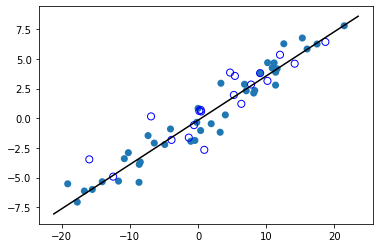

In [35]:
# Drawing regression model
plt.figure()
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg.predict(xx.reshape(-1,1)),color='black')

In [48]:
from sklearn.metrics import mean_squared_error
y_pred1 = reg.predict(X_train1.reshape(-1,1))
mean_squared_error(y_train1, y_pred1)

0.9810736341312382

In [49]:
y_pred1 = reg.predict(X_test1.reshape(-1,1))
mean_squared_error(y_test1, y_pred1)

1.845826956595782

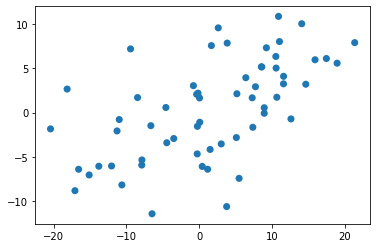

In [54]:
#####################
# Now we increase the variance of the axe of minimal variance
#############################""
et2 = 4
sca = np.array([[10, 0], [0, et2]])
datar2 = rd.dot(sca).dot(rot)
# Display points:
plt.figure()
plt.scatter(datar2[:,0],datar2[:,1],s=50,edgecolors='none')

In [57]:
# Using MLP with the new data
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1)

# evaluate and display 
clf.fit(X_train1.reshape(-1,1), y_train1)
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1)
print("Le coefficient R² de train est {}".format(coeff_train))
coeff_test = clf.score(X_test1.reshape(-1,1), y_test1)
print("Le coefficient R² de test est {}".format(coeff_test))

Le coefficient R² de train est 0.9489189194962208
Le coefficient R² de test est 0.7917293315547715


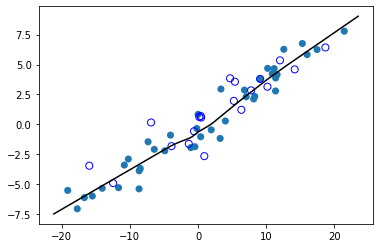

In [58]:
# Drwawing the regression model with MLP
plt.figure()
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')